In [ ]:
!pip install tqdm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pickle as pkl
from tqdm import tqdm

<div dir="rtl">   להלן הדוגמא הבאה: במפעל לייצור רכיבים חשמליים, ישנה מכונה שהיא צוואר בקבוק ולכן היא עובדת ללא הפסקה במשך יום עבודה. הבעיה היא  שכשהיא עובדת יותר מדי זמן ברציפות היא מתחממת במקרה כזה היא יכולה להירס ואפילו להתפוצץ. להלן נתנוים המראים את הקשר בין טמפרטורת המכונה לבין זמן עבודה. .

In [ ]:
# num_points = 60
# x_vals = np.linspace(0,30,num_points)
# a, b = 2280, 370
# y_vals_trans_1 = (a+b*x_vals + np.random.normal(0,155,num_points))**0.36
# pkl.dump(y_vals_trans_1, open('../pkl/y_vals_trans_1_tirgul.pkl', 'wb'))

In [2]:
num_points = 60
x_vals = np.linspace(0,30,num_points)
y_vals_trans_1 = pkl.load(open('../pkl/y_vals_trans_1_tirgul.pkl', 'rb'))

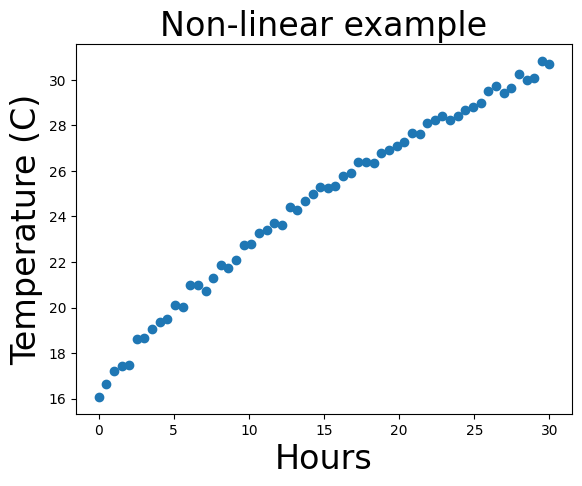

In [3]:
plt.figure()
plt.title('Non-linear example', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.show()

<div dir="rtl">  בוא נראה מה קורה אם אנחנו מתעלמים מחוסר הליניאריות. 

In [4]:
# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model = sm.OLS(y_vals_trans_1, x_vals1)
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2931.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.36e-51
Time:                        12:05:24   Log-Likelihood:                -51.816
No. Observations:                  60   AIC:                             107.6
Df Residuals:                      58   BIC:                             111.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6476      0.149    118.564      0.0

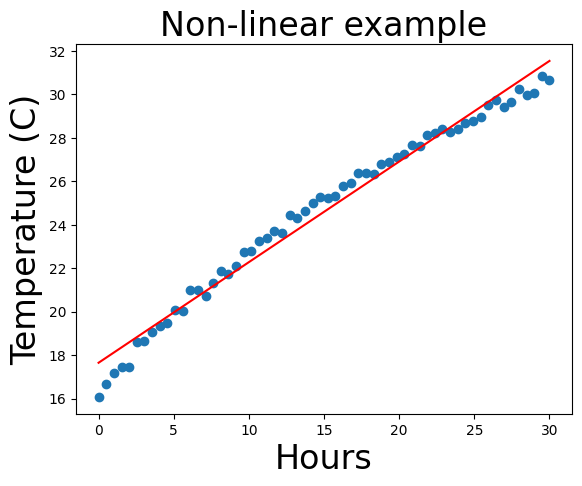

In [5]:
plt.figure()
plt.title('Non-linear example', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, results.predict(x_vals1), color = 'red')
plt.show()

## Transforming the data

<div dir="rtl">  במקום להשתמש בערכים האמיתיים של המשתנה המוסבר ננסה לעשות איזשהו טרנספורמציה ואולי נצליח לעשות למצוא קשר יותר ליניארי. להלן מספר טרנספורמציות אפשריות.

1. $Ln(Y)$ or $Log(Y)$
2. $Exp(Y)$
3. $Y^{0.5}$
4. $Y^2$

The model is:

$$ Ln(\hat{Y}) = b_0 + b_1 X_1 $$

Or,

$$ \hat{Y} = Exp(b_0 + b_1 X_1) $$

<div dir="rtl"> נתחיל עם טרנספורמציה של Ln.

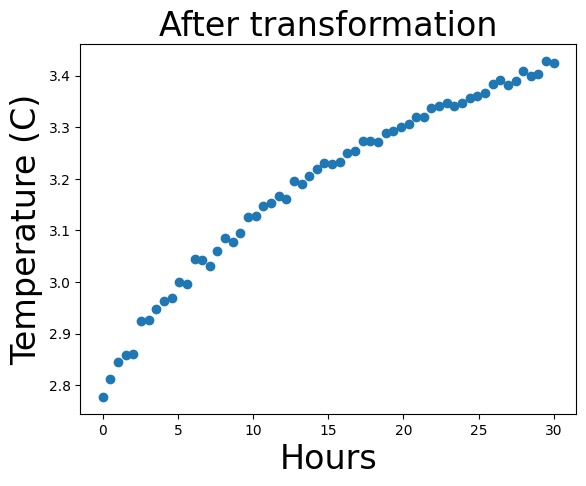

In [6]:
log_Y_trans_1 = np.log(y_vals_trans_1)
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, log_Y_trans_1)
plt.show()

In [7]:
# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model_trans1 = sm.OLS(log_Y_trans_1, x_vals1)
# Fit the model
results_trans1 = model_trans1.fit()
# Print summary statistics, including p-values for each coefficient
print(results_trans1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1167.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.11e-40
Time:                        12:05:32   Log-Likelihood:                 110.35
No. Observations:                  60   AIC:                            -216.7
Df Residuals:                      58   BIC:                            -212.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8937      0.010    290.083      0.0

<div dir="rtl"> אפשר לראות שעכשיו המדד של $R^2$ גדל משמעותית ל 0.991.

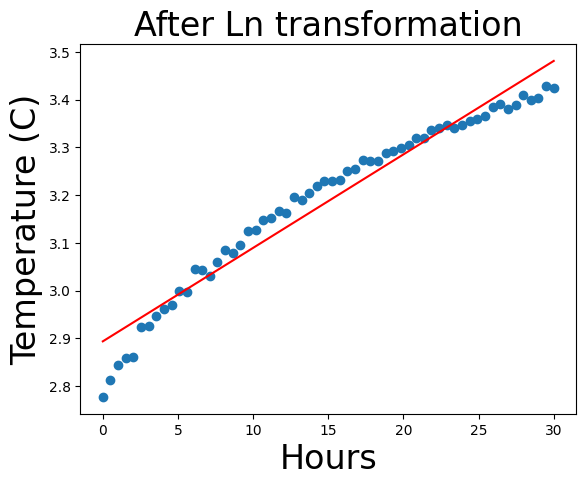

In [8]:
plt.figure()
plt.title('After Ln transformation', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, log_Y_trans_1)
plt.plot(x_vals, results_trans1.predict(x_vals1), color = 'red')
plt.show()

<div dir="rtl"> מה היה קורה אילו היינו עושים טרנספורמציה אחרת?
ננסה לעשות עכשיו טרנספורמצית שורש, כלומר:

$$ \sqrt{y} = b_0 +b_1 X_1$$

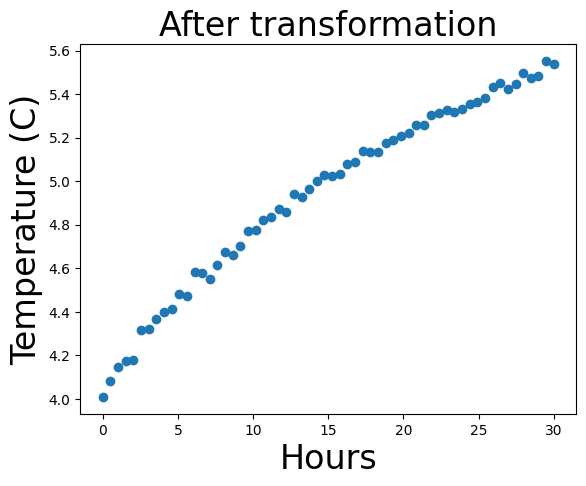

In [9]:
sqrt_Y_trans_1 = y_vals_trans_1**0.5
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, sqrt_Y_trans_1)
plt.show()

In [10]:
# Create a linear regression model
model_trans2 = sm.OLS(sqrt_Y_trans_1, x_vals1)
# Fit the model
results_trans2 = model_trans2.fit()
# Print summary statistics, including p-values for each coefficient
print(results_trans2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1774.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.45e-45
Time:                        12:05:37   Log-Likelihood:                 69.765
No. Observations:                  60   AIC:                            -135.5
Df Residuals:                      58   BIC:                            -131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2285      0.020    215.521      0.0

<div dir="rtl"> נראה שזה עדיף על פני המקור אבל פחות טוב מה$Ln$.

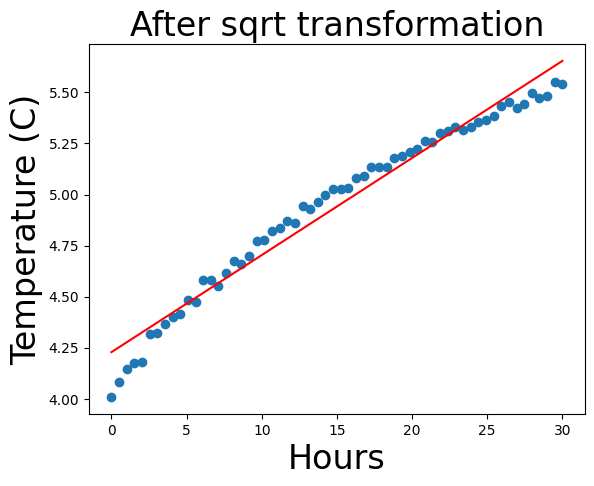

In [11]:
plt.figure()
plt.title('After sqrt transformation', fontsize= 24)
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.scatter(x_vals, sqrt_Y_trans_1)
plt.plot(x_vals, results_trans2.predict(x_vals1), color = 'red')
plt.show()

<div dir="rtl"> ננסה למצוא את ההתמרה של הנתונים בצורה יותר שיטתית. נעשה התמרה מהסוג:
$$ \hat{Y^n} = b_0 +b_1 X_1 $$
כאשר $n$ הוא ערך משתנה בטווח [0.1,10].

In [12]:
results_trans2.rsquared

0.9683459233948839

In [13]:
df_transforms = pd.DataFrame([])

num_trials = 100
for n in tqdm(np.linspace(0.1, 10, num_trials)):
    
    n_Y_trans_n = y_vals_trans_1**n
    # Create a linear regression model
    model_trans_n = sm.OLS(n_Y_trans_n, x_vals1)
    # Fit the model
    results_trans_n = model_trans_n.fit()

    current_R2 = results_trans_n.rsquared

    df_curr = {'n': [n], 'R2': [current_R2]}
    
    # df_transforms = df_transforms.append(df_curr, ignore_index = True)
    df_transforms = pd.concat([df_transforms, pd.DataFrame(df_curr)])
    

100%|██████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 722.69it/s]


In [14]:
df_transforms.sort_values('R2', ascending = False).head()

,n,R2
0,2.7,0.997492
0,2.6,0.997477
0,2.8,0.997395
0,2.5,0.997350
0,2.9,0.997190


<div dir="rtl"> בואו נראה את זה ויזואלית:

In [15]:
df_transforms = df_transforms.sort_values('R2', ascending = True)
df_transforms = df_transforms.reset_index()
df_transforms.head()

,index,n,R2
0,0,10.0,0.834694
1,0,9.9,0.837707
2,0,9.8,0.840723
3,0,9.7,0.843740
4,0,9.6,0.846758


In [16]:
df_transforms

,index,n,R2
0,0,10.0,0.834694
1,0,9.9,0.837707
2,0,9.8,0.840723
3,0,9.7,0.843740
4,0,9.6,0.846758
...,...,...,...
95,0,2.9,0.997190
96,0,2.5,0.997350
97,0,2.8,0.997395
98,0,2.6,0.997477


In [17]:
ind = 4

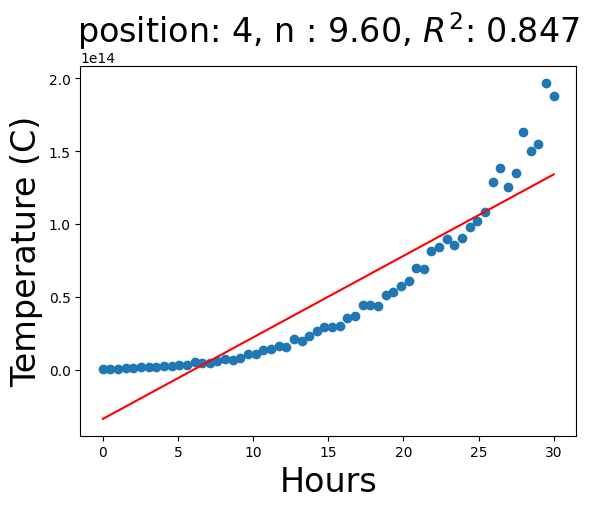

In [18]:
n_Y_trans_n = y_vals_trans_1**df_transforms.loc[ind, 'n']

curr_model =  sm.OLS(n_Y_trans_n, x_vals1)
    # Fit the model
curr_results_trans_n = curr_model.fit()


plt.figure()
plt.title('position: {}, n : {}, $R^2$: {}' .format(ind, "{:.2f}".format(df_transforms.loc[ind, 'n']), "{:.3f}".format(df_transforms.loc[ind, 'R2'])), fontsize = 24)
plt.scatter(x_vals, n_Y_trans_n)
plt.plot(x_vals, curr_results_trans_n.predict(x_vals1), color = 'red')
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.show()
ind += 5

<div dir="rtl"> לפי התוצאות נראה ש$n=2.7$ נותן את התוצאות הטובות ביותר.  בואו נראה איך המשוואה האמיתית נראית. בשביל לעשות את זה נעשה את הפעולה ההפוכה של חזקת n.

1. $\hat{Y}^n = b_o + b_1*X_1$
2. $\hat{Y} = (b_o + b_1*X_1)^{1/n}$

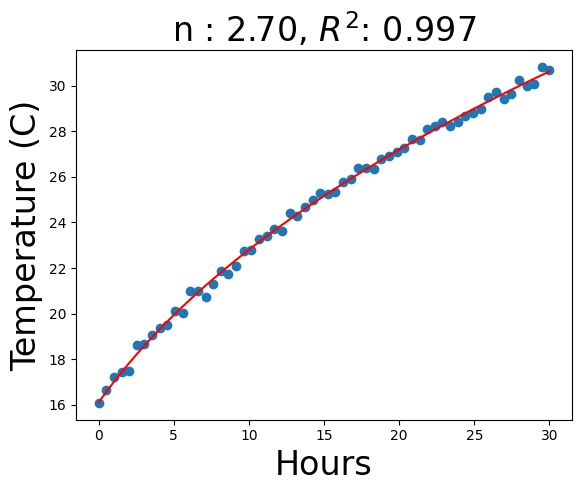

In [19]:
ind = 99
n_Y_trans_n = y_vals_trans_1**df_transforms.loc[ind, 'n']

curr_model =  sm.OLS(n_Y_trans_n, x_vals1)
    # Fit the model
curr_results_trans_n = curr_model.fit()

plt.figure()
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.title('n : {}, $R^2$: {}' .format( "{:.2f}".format(df_transforms.loc[ind, 'n']), "{:.3f}".format(df_transforms.loc[ind, 'R2'])), fontsize = 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, curr_results_trans_n.predict(x_vals1)**(1/df_transforms.loc[ind, 'n']), color = 'red')

<div dir="rtl"> נניח כי בין 22  ל-26 מעלות של המכונה זה נחשב למסוכן ומ-26 מעלות זה נחשב למסוכן מאד, מכמה שעות המכונה תהיה לראשונה במצב מסוכן? ומכמה תהיה לראשונה במצב מסוכן מאד?

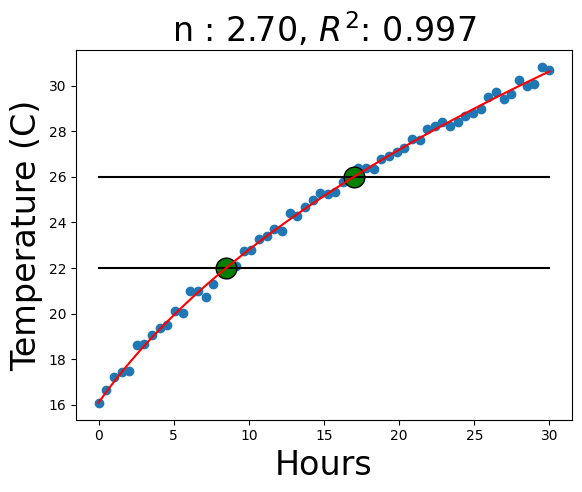

In [20]:
plt.figure()
plt.xlabel('Hours', fontsize= 24)
plt.ylabel('Temperature (C)', fontsize= 24)
plt.title('n : {}, $R^2$: {}' .format( "{:.2f}".format(df_transforms.loc[ind, 'n']), "{:.3f}".format(df_transforms.loc[ind, 'R2'])), fontsize = 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, 22*np.ones(x_vals.shape[0]), color = 'black')
plt.plot(x_vals, 26*np.ones(x_vals.shape[0]), color = 'black')
plt.scatter(8.489717304580065, 22, color = 'green', s=222, edgecolors= "black")
plt.scatter(16.976504191751605, 26, color = 'green', s=222, edgecolors= "black")
plt.plot(x_vals, curr_results_trans_n.predict(x_vals1)**(1/df_transforms.loc[ind, 'n']), color = 'red')

<div dir="rtl"> תחילה נמצא את המשוואה של הקו האמיתי תחת $n=2.7$. 

In [21]:
ind = 99
n_Y_trans_n = y_vals_trans_1**df_transforms.loc[ind, 'n']

curr_model =  sm.OLS(n_Y_trans_n, x_vals1)
    # Fit the model
curr_results_trans_n = curr_model.fit()

print(curr_results_trans_n.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.307e+04
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.99e-77
Time:                        12:06:06   Log-Likelihood:                -374.80
No. Observations:                  60   AIC:                             753.6
Df Residuals:                      58   BIC:                             757.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1810.7472     32.401     55.886      0.0

<div dir="rtl"> עבור 22:

$$ \hat{Y}^{2.7}  = 1810.7472 + 282.9029*X_1$$

$$ \hat{Y}  = (1810.7472 + 282.9029*X_1)^{1/2.7}$$

$$ 22  = (1810.7472 + 282.9029*X_1)^{1/2.7}$$

$$22^{2.7} =1810.7472  + 282.9029*X_1$$


$$ X_1 =  \frac{22^{2.7} -1810.7472}{282.9029}  $$



In [22]:
(22**2.7-1810.7472)/282.9029

8.489717304580065

<div dir="rtl"> עבור 26:

$$ \hat{Y}^{2.7}  = 1810.7472 + 282.9029*X_1$$

$$ \hat{Y}  = (1810.7472 + 282.9029*X_1)^{1/2.7}$$

$$ 26  = (1810.7472 + 282.9029*X_1)^{1/2.7}$$

$$26^{2.7} =1810.7472  + 282.9029*X_1$$


$$ X_1 =  \frac{26^{2.7} -1810.7472}{282.9029}  $$

In [23]:
(26**2.7-1810.7472)/282.9029

16.976504191751605

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">

<div dir="rtl">